In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresión Logística


In [2]:
# Funcion logistica
def logistic(x):
    return 1/(1 + np.exp(-x))

# funcion de perdida
def log_loss(y,y_prime):
    first_part = -y*np.log(y_prime)
    second_part = (1-y)*np.log(1 - y_prime)
    return first_part - second_part

# Funcion de costos
def cost_func(y,y_prime):
    return np.mean(log_loss(y,y_prime))

# Funcion de costo generalizada
def cost_func_logreg(y,X,w,b):
    # Estima X*w + b
    if X.shape[1] == len(w):
        vect_input = X@w + b
    else:
        raise Exception('Shapes dont match')
    # aplicacion regression logistica
    y_prime = logistic(vect_input)
    # Estimacion del error:
    loss = cost_func(y,y_prime)

    return loss

# Gradiente descendente

# Derivada w
def delta_w(X,w,b,y):
    vect_input = X@w + b
    dj_dw = (logistic(vect_input)-y)@X
    mean_dj_dw = np.mean(dj_dw)

    return mean_dj_dw

# Derivada b
def delta_b(X,w,b,y):
    vect_input = X@w + b
    dj_db = (logistic(vect_input)-y)
    mean_dj_db = np.mean(dj_db)

    return mean_dj_db

# Estima el gradiente descendiente
def gradient_descent(X,w,b,y,a,n_iter):
    # Lista para almacenar la perdida
    loss_history = list()
    for i in range(n_iter):
        
        grad_w = delta_w(X,w,b,y)
        grad_b = delta_b(X,w,b,y)
        w -=  a*grad_w
        b -=  a*grad_b
        # Estimacion del error
        loss = cost_func_logreg(y,X,w,b)
        loss_history.append(loss)

        if i%1000 == 0:
            print(f'Iteration:{i}, error: {loss}')

    return w,b,loss_history

# Ejemplo
X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 10000
w_opt,b_opt,loss = gradient_descent(X,w,b,y,alpha,n_iter)


Iteration:0, error: 0.6925849969661286
Iteration:1000, error: 0.354620831315222
Iteration:2000, error: 0.222431349297449
Iteration:3000, error: 0.15805629527849302
Iteration:4000, error: 0.12126075183333235
Iteration:5000, error: 0.09782324117983202
Iteration:6000, error: 0.08172309512467203
Iteration:7000, error: 0.07003888483261138
Iteration:8000, error: 0.06120056588415856
Iteration:9000, error: 0.05429574086865601


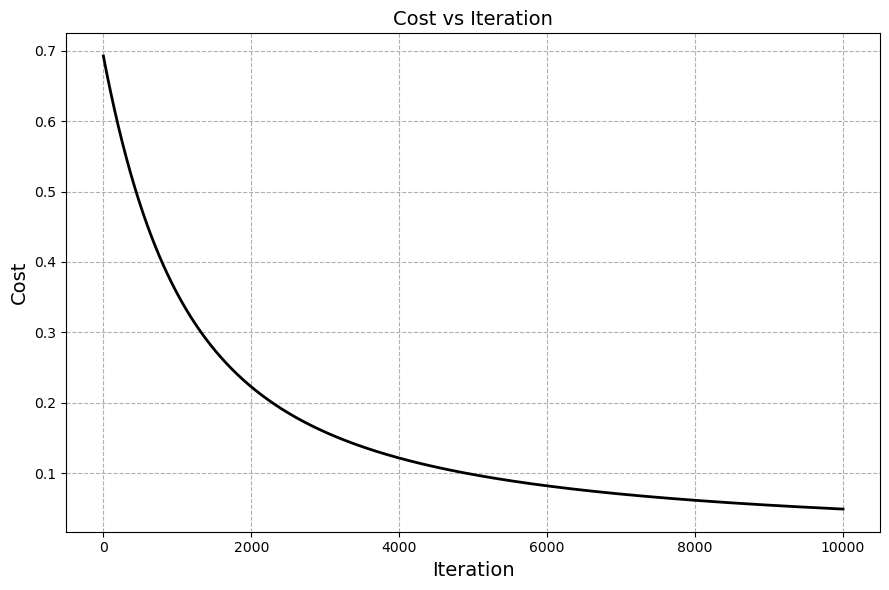

In [23]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(loss,color='k',linewidth=2)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.grid(linestyle='--')
plt.show()

## Aplicación de la regresión logística

In [5]:
# Loading the data
path = r'data\train.csv'
data = pd.read_csv(path)

## Exploracion de los datos
Se revisan la consistencia del dataframe al igual que posibles datos faltantes

In [7]:
100*(data.isna().sum()/len(data))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64